## 
# OUTLET SALES PREDICTIONS FOR BIG MART

Sales data were collected for 1559 products across 10 stores in different cities in 2013.

A detailed list of the specific attributes of each product and store is provided.

The aim of the project is to develop a predictive model that is able to predict the sales of<br>each product at a given timeframe at particular outlets.

A careful examination of the dataset led to the following models being selected for training:
    
     <li> LinearRegression Model</li>
     <li> RandomForestRegressor</li>
     <li> XGBRegressor</li>
    
    

*** ***

### Data collection and methodology
* Data Collection From working directory

  First to carry out the analysis, all the necessary and relevant libraries were imported on the jupiter Notebook.
  these libraries includes:
  * numpy
  * pandas
  * seaborn
  * matplotlib
  * plotly.expres* plotly.graph_object
  * plotly.subplots
  * warnings

## Evaluation Metric

test.csv dataset will be used for prediction and model perfomance will be evaluated on the basic of predicted values, the following evalution technique are consider for the model evalution:
    
    Root Mean Square Error
    R squared value
    Mean Absolute Error
    Accuracy Score               

   


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotnine import *
import warnings
warnings.filterwarnings('ignore')




** **

### DATA EXTRACTION FROM WORKING DIRECTORY

  We are obtaining the dataset from working directory

In [89]:
data_train = pd.read_csv("train.csv")

data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
data_test = pd.read_csv("test.csv")

data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### 
### Descriptive analysis For Train Dataset

Here we need to describe and get better understanding about our dataset

In [91]:
data_train.shape

(8523, 12)

In [92]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [93]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [94]:
# Chech for missing numbers
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

****

### CLEAN UP THE DATASET

#### Let check for duplicate in our dataset

In [95]:
data_train.duplicated().sum()

0

#### Fill the missing number Item_Weight column with mean

In [96]:
Item_Weight_mean = data_train['Item_Weight'].mean()

In [97]:
data_train['Item_Weight'].fillna(Item_Weight_mean, inplace=True)

In [98]:
data_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [99]:
data_train['Outlet_Size'].fillna("Medium",inplace=True)

In [100]:
data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [101]:
# get the unique()
data_train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [102]:
data_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

#### Check Unique value of each columns

In [103]:

data_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [104]:
data_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [105]:
data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [106]:
data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [107]:
data_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [108]:
data_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [109]:
data_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [110]:
data_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [111]:
data_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [112]:
data_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

#### Replace The fat Items with only Fat Low and Regular

In [113]:
data_train["Item_Fat_Content"]=data_train["Item_Fat_Content"].str.replace('reg','Regular')
data_train["Item_Fat_Content"]=data_train["Item_Fat_Content"].str.replace('LF','Low Fat')
data_train["Item_Fat_Content"]=data_train["Item_Fat_Content"].str.replace('low fat','Low Fat')

#### Replace The Outlet_Size value nan with Medium

In [114]:
data_train["Outlet_Size"] = data_train["Outlet_Size"].str.replace('nan','Medium')

In [115]:
data_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Insight From Correlation

In [116]:
corr = data_train.corr()

corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


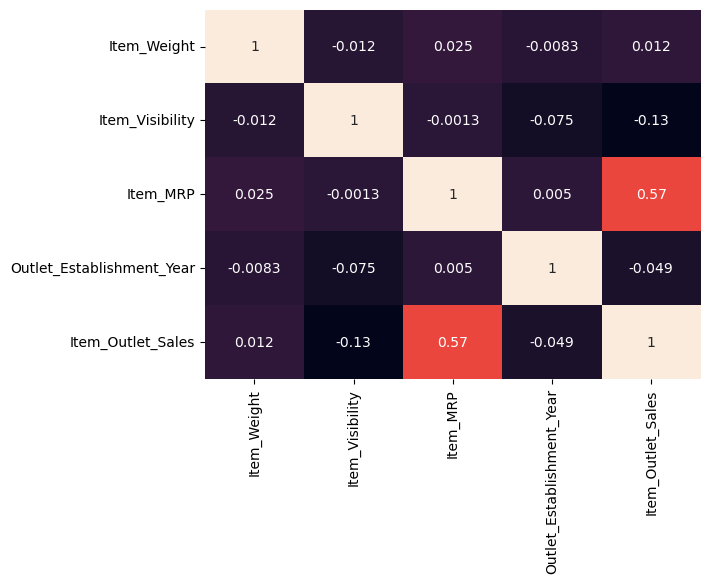

In [117]:
corr = data_train.corr()
sns.heatmap(corr,annot=True,cbar=False)
corr

## 
## VISULIZATION


#### HISTOGRAM PLOT

<function matplotlib.pyplot.show(close=None, block=None)>

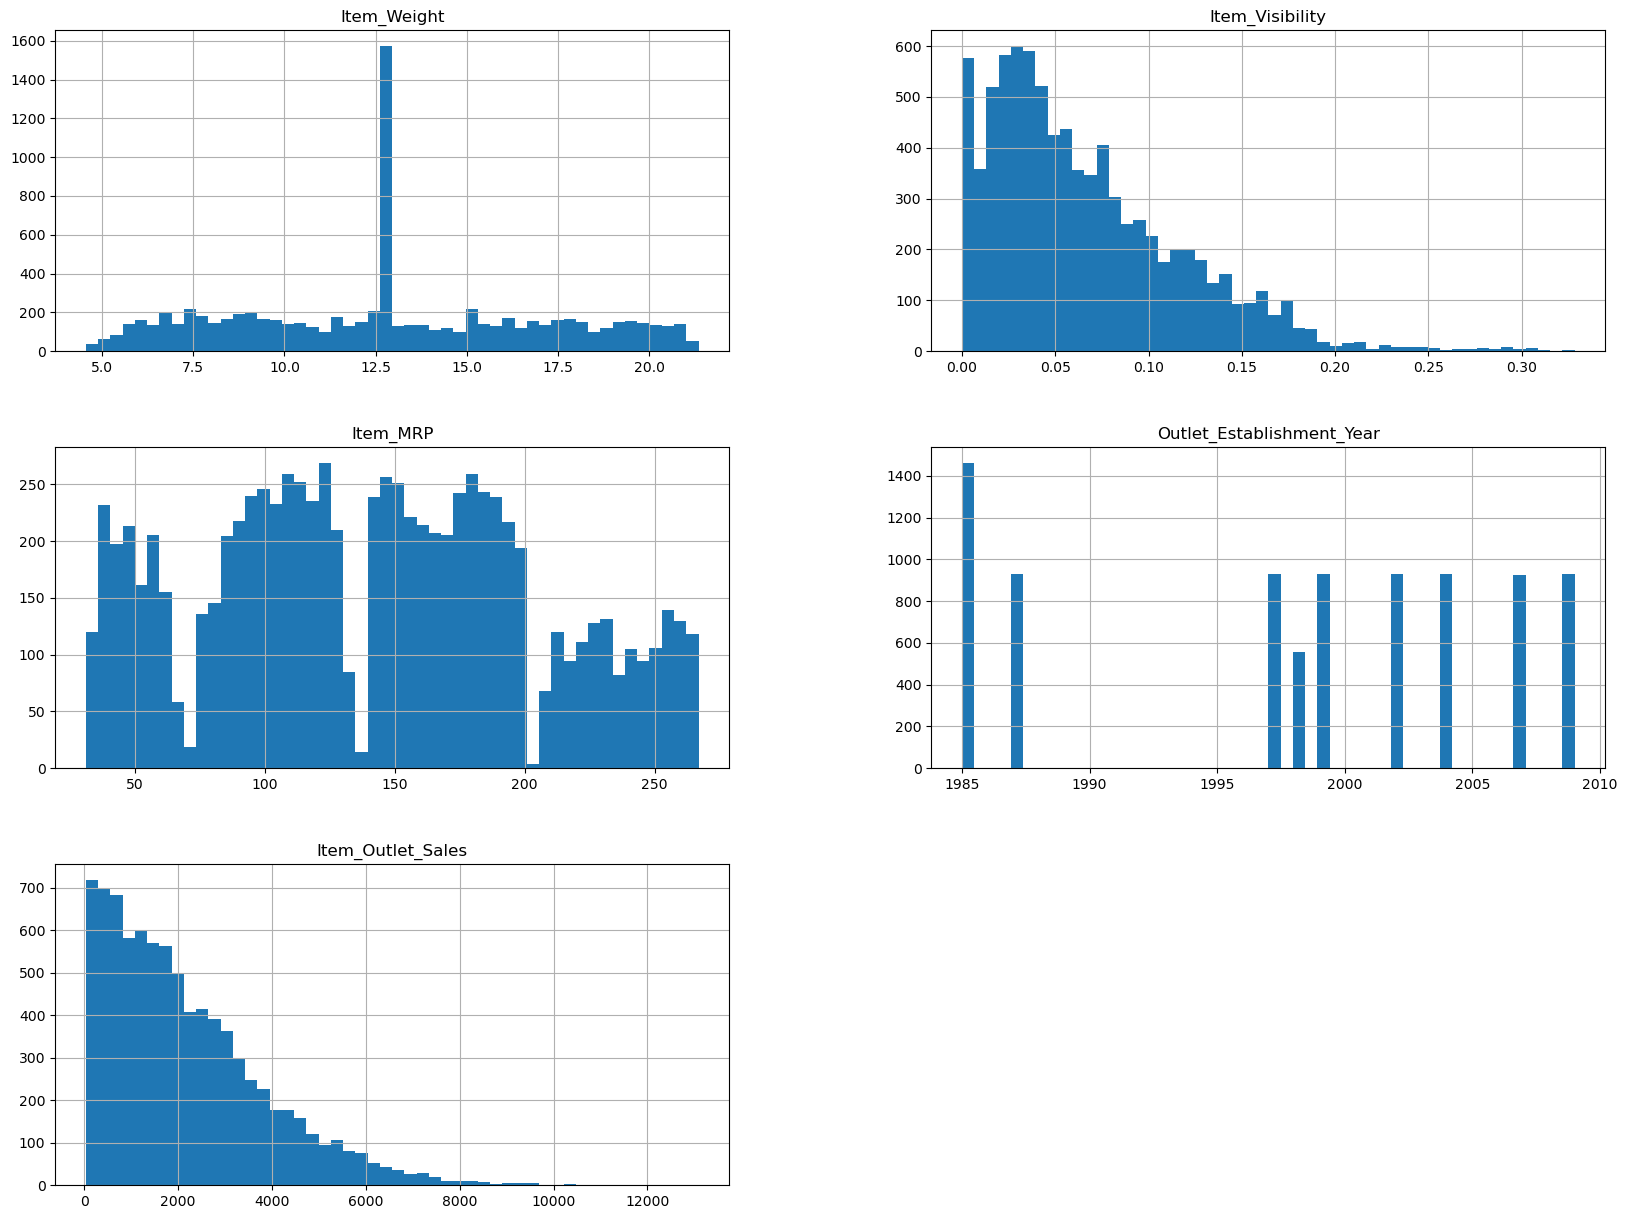

In [118]:
data_train.hist(bins = 50 ,figsize = (20,15))
plt.show

## 

#### PIE CHART GGPLOT

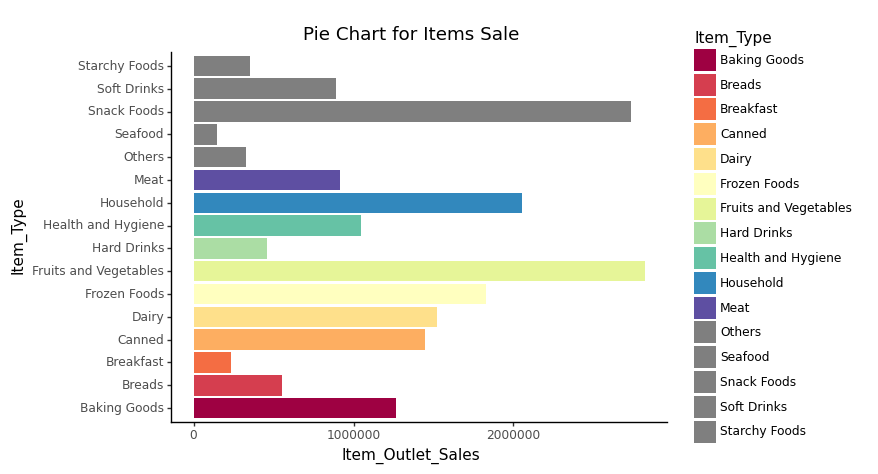

<ggplot: (198968987362)>

In [119]:
Sales_plot = (ggplot(data_train, aes(x ='Item_Type', y = 'Item_Outlet_Sales', fill = 'Item_Type')) 
              + geom_col() + coord_flip() + scale_fill_brewer(type = 'div', palette = 'Spectral') 
              + theme_classic() + ggtitle('Pie Chart for Items Sale'))
display(Sales_plot)

## 

#### TreeMapPLOT

In [120]:
tree_fig = px.treemap(data_train, 
        path=['Outlet_Type', 'Item_Type'], 
        values='Item_Outlet_Sales',
        color='Item_Outlet_Sales',
        color_continuous_scale='RdBu',
        title='Item_Type count by Outlet_Type')

tree_fig 

In [121]:
px.pie(data_train, values='Item_Outlet_Sales', names='Outlet_Type', title = 'Gross Outlet Sales')

## 
## Training The Dataset For Sales Prediction

In [122]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder()
data_train["Outlet_Type"] = ord_enc.fit_transform(data_train[["Outlet_Type"]])
data_train['Outlet_Location_Type'] =ord_enc.fit_transform(data_train[["Outlet_Location_Type"]])
data_train['Outlet_Size'] =ord_enc.fit_transform(data_train[["Outlet_Size"]])
data_train['Item_Fat_Content'] =ord_enc.fit_transform(data_train[["Item_Fat_Content"]])
data_train['Item_Type'] =ord_enc.fit_transform(data_train[["Item_Type"]])

data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.92,1.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.50,0.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.20,1.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.93,0.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052


## 
### Separate The Train dataset into Feature And Target

In [123]:
target = data_train['Item_Outlet_Sales']

In [124]:
target = pd.DataFrame(target, columns=['Item_Outlet_Sales'])

target.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [125]:
feature = data_train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis =1)

feature.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0
1,5.92,1.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0
2,17.50,0.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0
3,19.20,1.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0
4,8.93,0.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0


In [126]:
feature.shape

(8523, 9)

## 
### Let Proccess The Test Dataset 

In [127]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [128]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [129]:
Item_Weight_mean1 = data_test['Item_Weight'].mean()

In [130]:
data_test['Item_Weight'].fillna(Item_Weight_mean1, inplace=True)

data_test['Outlet_Size'].fillna("Medium",inplace=True)

In [131]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### Replace The fat Items with only Fat Low and Regular

In [132]:
data_test["Item_Fat_Content"]=data_test["Item_Fat_Content"].str.replace('reg','Regular')
data_test["Item_Fat_Content"]=data_test["Item_Fat_Content"].str.replace('LF','Low Fat')
data_test["Item_Fat_Content"]=data_test["Item_Fat_Content"].str.replace('low fat','Low Fat')

#### Encode the text values

In [133]:
data_test["Outlet_Type"] = ord_enc.fit_transform(data_test[["Outlet_Type"]])
data_test['Outlet_Location_Type'] =ord_enc.fit_transform(data_test[["Outlet_Location_Type"]])
data_test['Outlet_Size'] =ord_enc.fit_transform(data_test[["Outlet_Size"]])
data_test['Item_Fat_Content'] =ord_enc.fit_transform(data_test[["Item_Fat_Content"]])
data_test['Item_Type'] =ord_enc.fit_transform(data_test[["Item_Type"]])

data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0.0,0.007565,13.0,107.8622,OUT049,1999,1.0,0.0,1.0
1,FDW14,8.300000,1.0,0.038428,4.0,87.3198,OUT017,2007,1.0,1.0,1.0
2,NCN55,14.600000,0.0,0.099575,11.0,241.7538,OUT010,1998,1.0,2.0,0.0
3,FDQ58,7.315000,0.0,0.015388,13.0,155.0340,OUT017,2007,1.0,1.0,1.0
4,FDY38,12.695633,1.0,0.118599,4.0,234.2300,OUT027,1985,1.0,2.0,3.0


In [134]:
test = data_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0.0,0.007565,13.0,107.8622,1999,1.0,0.0,1.0
1,8.300000,1.0,0.038428,4.0,87.3198,2007,1.0,1.0,1.0
2,14.600000,0.0,0.099575,11.0,241.7538,1998,1.0,2.0,0.0
3,7.315000,0.0,0.015388,13.0,155.0340,2007,1.0,1.0,1.0
4,12.695633,1.0,0.118599,4.0,234.2300,1985,1.0,2.0,3.0


In [135]:
# # Standardizing our training and testing data.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# test = scaler.fit_transform(test)

In [136]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0.0,0.007565,13.0,107.8622,1999,1.0,0.0,1.0
1,8.300000,1.0,0.038428,4.0,87.3198,2007,1.0,1.0,1.0
2,14.600000,0.0,0.099575,11.0,241.7538,1998,1.0,2.0,0.0
3,7.315000,0.0,0.015388,13.0,155.0340,2007,1.0,1.0,1.0
4,12.695633,1.0,0.118599,4.0,234.2300,1985,1.0,2.0,3.0


## 
## Split the Train dataset

In [137]:
feature.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0
1,5.92,1.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0
2,17.50,0.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0
3,19.20,1.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0
4,8.93,0.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0


In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42 )

In [139]:
# # Standardizing our training and testing data.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [140]:
# y_test = scaler.inverse_transform(y_test)
# regr_predicted = scaler.inverse_transform(regr_predicted)

## 
### Model Function

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def Model(model):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)
    regr_predicted = model.predict(X_test)
    MSE=mean_squared_error(y_test, regr_predicted)
    MAE=mean_absolute_error(y_test, regr_predicted)
    r2=r2_score(y_test, regr_predicted)
    RMSE = np.sqrt(MSE)
    print("R squared value:           ", r2)
    print("Root Mean Squared Error :  ", RMSE)
    print("Mean Absolute Error :      ", MAE)
    print("Testing Score              ",score)
  

## 
### Linear Regression

In [142]:
l_regr = LinearRegression()
l_regr.fit(X_train, y_train)

LinearRegression()

In [143]:
l_regr_predicted = l_regr.predict(X_test)

In [144]:
# y_test = scaler.inverse_transform(y_test)
# l_regrr_predicted = scaler.inverse_transform(regr_predicted)

In [145]:
l_regr_predicted

array([[1093.69673088],
       [ 611.67421823],
       [1051.44187003],
       ...,
       [ 549.77106193],
       [1173.86677709],
       [1606.67639753]])

In [146]:
l_regr.predict(feature)

array([[4288.62395176],
       [1355.29192527],
       [2575.94469287],
       ...,
       [ 904.8941844 ],
       [1999.73519837],
       [1150.32893573]])

In [147]:
l_regr_predicted_df = pd.DataFrame(data = l_regr_predicted)

l_regr_predicted_df.head()

,0
0,1093.696731
1,611.674218
2,1051.441870
3,4236.397791
4,2766.952479


### Evalution

In [148]:
l_regr = LinearRegression()
Model(l_regr)

R squared value:            0.5241348086667037
Root Mean Squared Error :   1137.271887364116
Mean Absolute Error :       856.0338972476158
Testing Score               0.5241348086667037


## 
### RandomForestRegressor

In [149]:
r_reg = RandomForestRegressor(n_estimators=2000)
r_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000)

In [150]:
r_reg_predicted = r_reg.predict(X_test)

In [151]:
r_reg_predicted

array([ 735.2272937,  875.8329351,  739.3825515, ...,  768.3461831,
        599.4683434, 1520.2664144])

In [152]:
r_reg.predict(feature)

array([4327.8837608,  551.092647 , 2090.7757868, ..., 1288.6921861,
       1396.6336795,  942.7078845])

In [153]:
r_reg_predicted_df = pd.DataFrame(data = r_reg_predicted)

r_reg_predicted_df.head()

,0
0,735.227294
1,875.832935
2,739.382552
3,4542.021020
4,2321.989817


### Evalution

In [154]:
r_reg = RandomForestRegressor(n_estimators=100)
Model(r_reg)

R squared value:            0.5629051658346538
Root Mean Squared Error :   1089.959024704237
Mean Absolute Error :       760.2100299765395
Testing Score               0.5629051658346538


## 
### XGBRegressor

In [155]:
regX = XGBRegressor(n_estimators=1000)

regX.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [156]:
regX_predicted = regX.predict(X_test)

In [157]:
regX_predicted

array([ 406.79907,  986.29553, 1308.9359 , ..., 1170.0616 , 1110.8052 ,
       1887.755  ], dtype=float32)

In [158]:
regX.predict(feature)

array([3798.805  ,  465.39124, 2082.9727 , ..., 1219.7411 , 1729.1519 ,
        735.5969 ], dtype=float32)

In [159]:
regX_predicted_df = pd.DataFrame(data = regX_predicted)

regX_predicted_df.head()

,0
0,406.799072
1,986.295532
2,1308.935913
3,3892.210449
4,868.773376


### Evalution

In [160]:
regX = RandomForestRegressor(n_estimators=100)
Model(regX)

R squared value:            0.5636353241371028
Root Mean Squared Error :   1089.0482666641838
Mean Absolute Error :       758.5963767906157
Testing Score               0.5636353241371028


## 
### PREDICTION FOR THE test DATASET

### LinearRegression Model

In [161]:
l_regr_predicted_Item_Outlet_sales = l_regr.predict(test)

pd.DataFrame(data = l_regr_predicted_Item_Outlet_sales).head()

,0
0,2055.654279
1,1358.753291
2,2170.698171
3,2393.948944
4,5057.716797


### RandomForestRegressor Model

In [162]:
r_reg_predicted_Item_Outlet_Sales = r_reg.predict(test)

pd.DataFrame(data = r_reg_predicted_Item_Outlet_Sales).head()

,0
0,1816.175898
1,1193.885928
2,550.157198
3,2448.506132
4,6350.919724


### XgbRegrssor Model

In [163]:
regX_predicted_Item_Outlet_Sales = regX.predict(test)

pd.DataFrame(data = regX_predicted_Item_Outlet_Sales).head()

,0
0,1756.200634
1,1184.178564
2,511.274478
3,2591.007306
4,6276.290202


### 
### SAVE THE MODEL USING JOBLIB

In [164]:
import joblib

In [165]:
joblib.dump(l_regr, 'l_regr_bigMart_dataset.pkl')

['l_regr_bigMart_dataset.pkl']

In [166]:
# Reloading the Model
l_regr_model = joblib.load('l_regr_bigMart_dataset.pkl')

In [167]:
joblib.dump(r_reg, 'r_reg_bigMart_dataset.pkl')

['r_reg_bigMart_dataset.pkl']

In [168]:
# Reloading the Model
r_reg_model = joblib.load('r_reg_bigMart_dataset.pkl')

In [169]:
joblib.dump(regX, 'regX_bigMart_dataset.pkl')

['regX_bigMart_dataset.pkl']

In [170]:
# Reloading the Model
regX_model = joblib.load('regX_bigMart_dataset.pkl')

In [171]:
# # Standardizing our training and testing data.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# feature1 = scaler.fit_transform(feature)


In [172]:
# X=train.iloc[:,:-1]
# y=train.iloc[:,-1]
# key=X.keys()
# X

In [173]:
# scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
# X = scaler.fit_transform(X)
# test=scaler.fit_transform(test)
# X=pd.DataFrame(X,columns=key)
# X

In [174]:
# from matplotlib import pyplot
# pyplot.plot(reg_predicted)
# pyplot.plot(regr_predicted, color = 'red')
# pyplot.show()